# Projeto: Machine Learning I

<font size=5.><center><b>Classificação binária com um conjunto de dados de previsão de AVC</b></center></font>

<p style='text-align: justify;'><font size=3>Segundo o Ministério da Saúde, o Acidente Vascular Cerebral é uma doença em que os vasos que levam sangue ao cérebro entopem ou se rompem, provocando uma paralisia na área que ficou sem circulação sanguínea. O AVC acomete mais homens e é uma das principais causas de morte, incapacitação e internações em todo o mundo.</font></p>

<p style='text-align: justify;'><font size=3>A Organização Mundial da Saúde (OMS), afirma que o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de óbitos. Com base nisso, nosso objetivo será aplicar técnicas de aprendizagem de máquina para prever se um paciente tem probabilidade de sofrer ou não um acidente vascular cerebral com base nos parâmetros do conjunto de dados com a intenção auxiliar na adoção de medidas de prevenção da doença.</font></p>


<font size=2><b>Fontes</b>: 
https://www.em.com.br/app/noticia/bem-viver/2022/04/18/interna_bem_viver,1360730/avc-e-a-segunda-causa-de-mortes-no-mundo-e-avanca-nos-paises-de-baixa-renda.shtml | https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/avc</font>


<font size=2><b>Fonte dos dados</b>: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv.</font>

<font size=2>Para baixar a base concatenada, acesso o drive: https://drive.google.com/drive/folders/1ccl2ocMkPtjqaC1-ktYa1kKzop_jXI1Y?usp=sharing</font>


![Descrição da Imagem](img/AVC-300x164.jpg)

<font size=2 color='red'><b>DISCLAIMER</b>: os resultados e conclusões apresentados nesta análise foram gerados para fins didáticos e têm como único propósito fornecer informações para o projeto de conclusão do módulo do curso Santander Coders - DS e não devem ser considerados como um diagnóstico médico ou uma avaliação definitiva das relações entre as variáveis e a ocorrência de acidente vascular cerebral (AVC).</font>

<font size=4.5><center><b>Dicionário dos dados</b></center></font>

|Campos|Descrição|
|---|---|
|id|identificador único|
|gender|masculino, feminino ou outro|
|age|idade do paciente|
|hypertension|0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão|
|heart_disease|0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca|
|ever_married|não ou sim|
|work_type|crianças, trabalho governamental, nunca trabalhei, privado, autônomo|
|Residence_type|rural ou urbano|
|avg_glucose_level|nível médio de glicose no sangue|
|bmi|índice de massa corporal|
|smoking_status|ex-fumante, nunca fumou, fuma ou desconhecido*|
|stroke| 1 se o paciente teve acidente vascular cerebral ou 0 se não|

*Nota: "Unknown" em smoking_status significa que a informação não está disponível para este paciente

### Imports necessários

In [1]:
"""
    Bibliotecas básicas de DS
"""
import warnings
import numpy as np
import pandas as pd

"""
    Bibliotecas de visualização de dados
"""
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
%matplotlib inline

"""
 Bibliotecas para análise do dataset
"""
import sidetable

"""
 Biblioteca de ML
"""
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, log_loss

"""
 Biblioteca de MLOps
"""
import mlflow
import mlflow.sklearn


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

### Conjunto de dados

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.head(1)

Linhas: 5110 | Colunas: 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


### Informação dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Valores nulos

In [4]:
df.stb.missing()

,missing,total,percent
bmi,201,5110,3.933464
id,0,5110,0.000000
gender,0,5110,0.000000
age,0,5110,0.000000
hypertension,0,5110,0.000000
heart_disease,0,5110,0.000000
ever_married,0,5110,0.000000
work_type,0,5110,0.000000
Residence_type,0,5110,0.000000
avg_glucose_level,0,5110,0.000000


#### Imputação valores nulos

> Pelo fato do índice de massa corporal do paciente ser importante para identificar a obesidade, que é um fator de risco significativo para acidente vascular cerebral, optaremos por preencher valores nulos usando a técnica de interpolação linear. Essa técnica permite preencher esses nulos com valores intermediários usando como base os valores circundantes. Neste método, os valores intermediários são estimados por uma reta que liga os pontos de dados vizinhos

In [5]:
df['bmi'].interpolate(method='linear', inplace=True, limit_direction='both')

#### Correção tipo de dados

In [6]:
df['age'] = df['age'].astype(int)

mapSimOuNao = {0: 'No', 1: 'Yes'}

df['hypertension'] = df['hypertension'].map(mapSimOuNao)
df['heart_disease'] = df['heart_disease'].map(mapSimOuNao)
df['stroke'] = df['stroke'].map(mapSimOuNao)

### Seleção de features

> Removidas as features não relevantes para as análises

In [7]:
df.drop(['id'], axis=1, inplace=True)

### Base final

In [8]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
207,Male,78,No,No,No,Self-employed,Urban,90.19,26.9,never smoked,Yes
2009,Female,21,No,No,No,Private,Rural,93.00,25.7,never smoked,No
3891,Male,77,No,No,Yes,Self-employed,Urban,57.60,32.2,Unknown,No
4876,Female,47,No,No,Yes,Private,Urban,99.36,23.8,smokes,No
4934,Male,1,No,No,No,children,Rural,107.02,31.4,Unknown,No


### Perfil médio de todos os pacientes

In [9]:
df.describe().round(2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,5110.00
mean,43.22,106.15,28.93
std,22.63,45.28,7.78
min,0.00,55.12,10.30
25%,25.00,77.24,23.60
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


<p style='text-align: justify;'><font size=3.>A idade dos pacientes na base de dados varia consideravelmente, com valores entre 0 e 82 anos. A média de idade é de aproximadamente 43 anos, com a maioria dos pacientes com idades entre 25 e 61 anos. A idade mínima na base de dados é 0, embora isso possa ser problemático, será mantido considerando que a variável work_type deixa claro que são crianças.</font></p>

<p style='text-align: justify;'><font size=3.>O nível médio de glicose no sangue varia significativamente, com valores entre 55,12 e 271,74. Essa variação indica que alguns pacientes têm níveis muito baixos e outros têm níveis muito altos de glicose. A média está em torno de 106,15, indicando que a maioria dos pacientes tem níveis de glicose na faixa acima do recomendado.</font></p>

<p style='text-align: justify;'><font size=3.>O IMC também varia consideravelmente, entre 10,30 e 97,60. A média é de cerca de 28,93, o que está na faixa de sobrepeso, com o desvio padrão de aproximadamente 7,78. Isso significa que os valores estão bastante espalhados em relação à média, o que pode indicar pacientes com grande variação de peso corporal, sendo alguns deles consideravelmente acima da média e outros significativamente abaixo.</font></p>

In [10]:
df.describe(include='O')

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,No,No,Yes,Private,Urban,never smoked,No
freq,2994,4612,4834,3353,2925,2596,1892,4861


<p style='text-align: justify;'><font size=3.>A base de dados é composta, majoritariamente, por pacientes do sexo feminino. Vemos também que a maioria não tem hipertensão, não possui doença cardíaca e não tiveram um AVC. Além disso, a maior parte dos pacientes trabalha no setor privado, reside em áreas urbana, é casada e nunca fumou.</font></p>

### Outliers

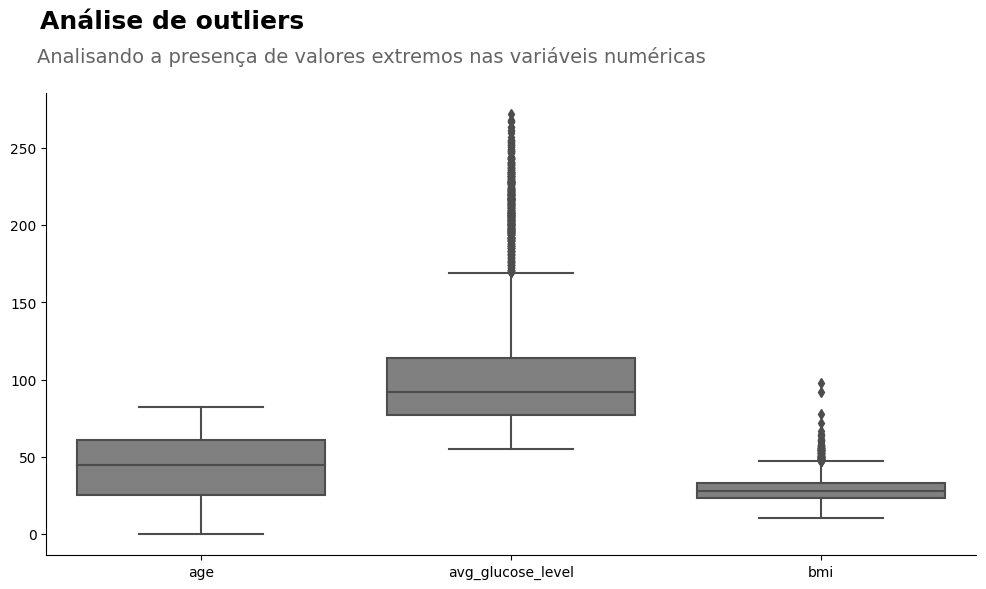

In [11]:
suptitle = 'Análise de outliers'
title = 'Analisando a presença de valores extremos nas variáveis numéricas'

ax = sns.boxplot(data=df, color='#808080')
ax.figure.set_size_inches(12, 6)
ax.spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Analisando os dados em busca de outliers podemos ver que alguns pacientes apresentam valores de glicose em níveis elevados e a maioria dos pacientes tem índices de massa corporal acima do normal, indicando um potencial problema de sobrepeso. Esses valores extremos são informações importantes, uma vez que diabetes, sobrepeso e obesidade são alguns dos fatores que aumentam a probabilidade de ocorrência de um AVC.</font></p>

<font size=2><b>Fontes</b>: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/avc</font>

### Stroke vs. Não stroke

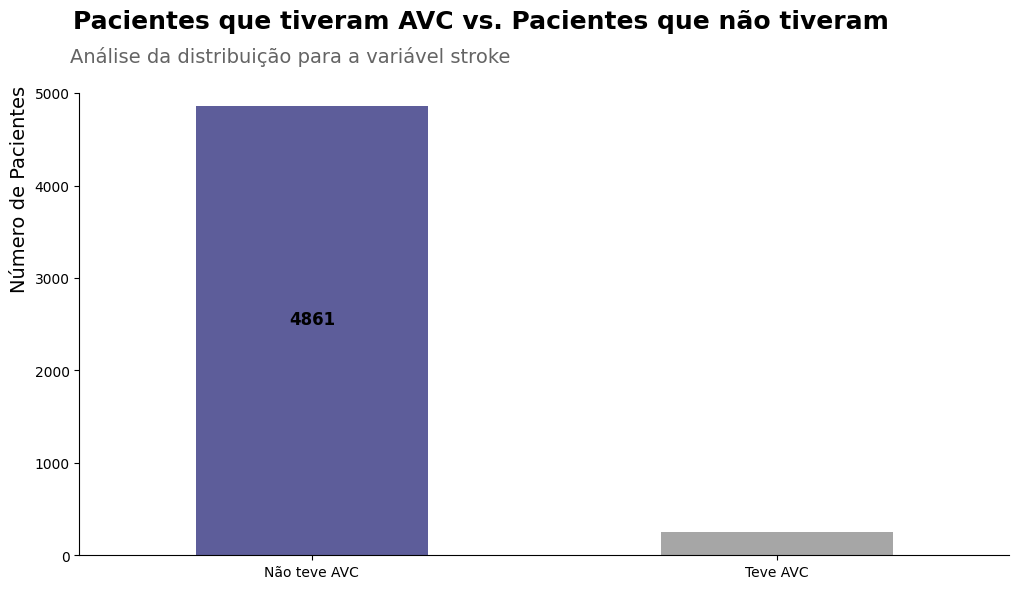

In [12]:
suptitle = 'Pacientes que tiveram AVC vs. Pacientes que não tiveram'
title = 'Análise da distribuição para a variável stroke'
colors=['#191970', '#808080']

strokeCounts = df['stroke'].value_counts()
strokeCounts.plot.bar(width=0.5, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('Número de Pacientes', fontsize=14, horizontalalignment='left', y=0.57)
plt.xticks([0, 1], ['Não teve AVC', 'Teve AVC'])
plt.text(0, 2500, '4861', fontsize=12, weight='bold', horizontalalignment='center')
plt.ylim(0, 5000)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>A distribuição de pacientes que tiveram AVC em comparação com aqueles que não tiveram mostra um desequilíbrio significativo das classes. Isso significa que a maioria dos pacientes na base de dados não teve um derrame, como já tinhamos visto antes. Isso pode ser um desafio na hora de desenvolver modelos de aprendizado de máquina, uma vez que modelos treinados em dados desequilibrados podem ser tendenciosos em direção à classe majoritária.</font></p>

## Perfil dos pacientes que tiveram AVC

> Como nosso interesse é predizer um AVC, vamos avaliar o perfil dos pacientes que tiveram um derrame

In [13]:
avc = df.query('stroke=="Yes"')
print(f'Total de pacientes tiveram AVC: {len(avc)} pacientes.')

Total de pacientes tiveram AVC: 249 pacientes.


### Idade

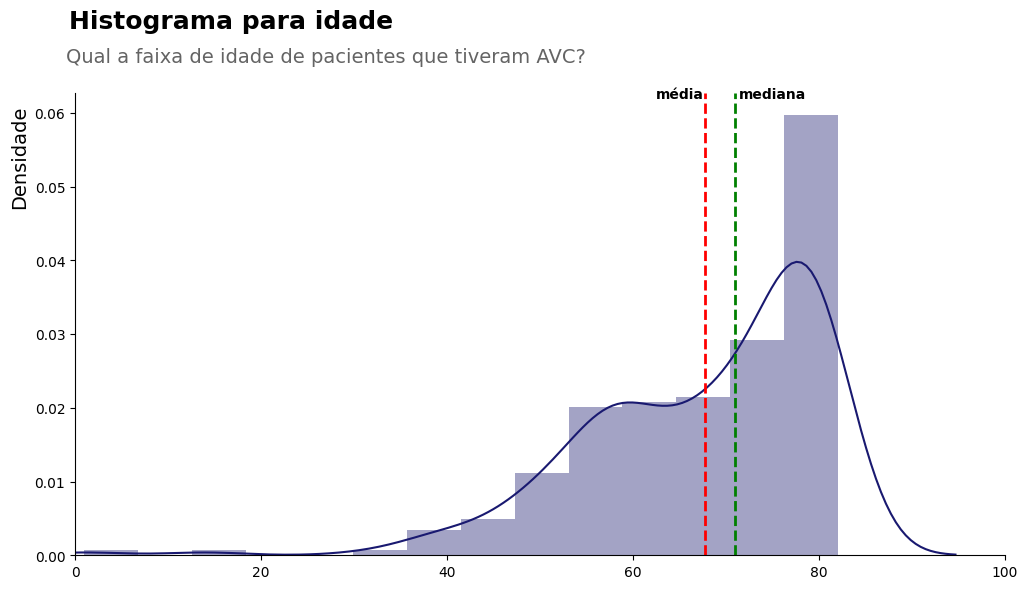

In [14]:
suptitle = 'Histograma para idade'
title = 'Qual a faixa de idade de pacientes que tiveram AVC?'

ax = sns.distplot(avc['age'], kde=True, color='#191970')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Densidade', fontsize=14, horizontalalignment='left', y=0.75)
ax.set_xlabel(None)
ax.spines[['top', 'right']].set_visible(False)

plt.axvline(x=67.727, color='r', linestyle='dashed', linewidth=2, label='Média')
plt.text(65, 0.062, 'média', fontsize=10, weight='bold', horizontalalignment='center')
plt.axvline(x=71.000, color='g', linestyle='dashed', linewidth=2, label='Mediana')
plt.text(75, 0.062, 'mediana', fontsize=10, weight='bold', horizontalalignment='center')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlim(0, 100)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Em média, os pacientes que sofreram um AVC têm cerca de 68 anos de idade, com o desvio padrão de aproximadamente 13 anos, que indica que alguns pacientes podem ter idades significativamente mais jovens ou mais velhas que a média. Podemos perceber que há uma concentração significativa de casos em pacientes com idades mais avançadas, mas também alguns casos em idades mais jovens. A mediana é de 71 anos, o que significa que metade dos pacientes tem 71 anos ou menos e a outra metade está acima de 71.</font></p>

<p style='text-align: justify;'><font size=3.>Esse resultado faz sentido uma vez que, segundo o Ministério da Saúde, pessoas com mais de 55 anos possuem maior propensão a desenvolver o AVC.</font></p>


<font size=2><b>Fontes</b>: https://bvsms.saude.gov.br/avc-acidente-vascular-cerebral/</font>

### Sexo biológico

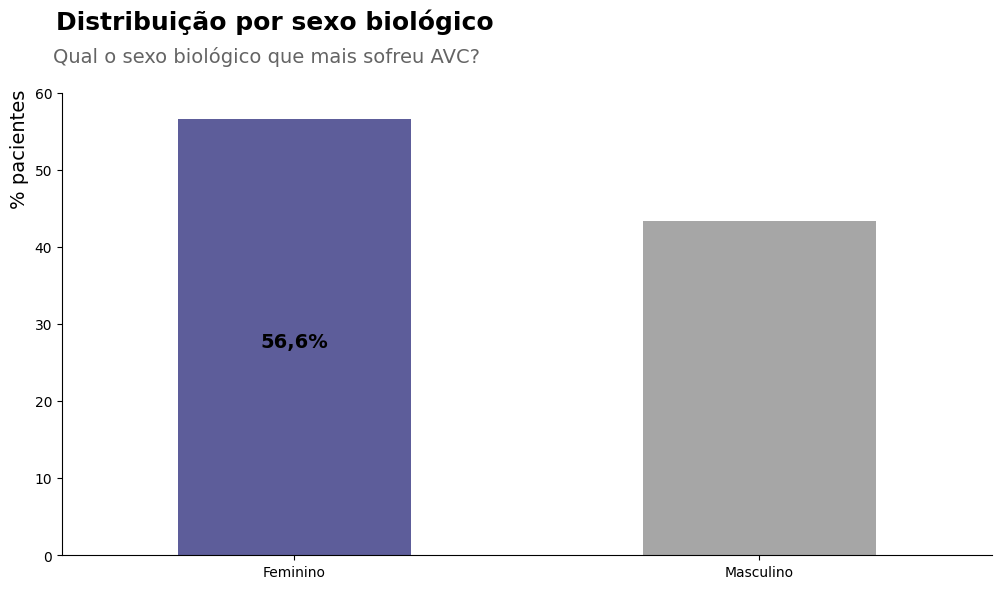

In [15]:
suptitle = 'Distribuição por sexo biológico'
title = 'Qual o sexo biológico que mais sofreu AVC?'
colors=['#191970', '#808080']

dist_freq = (avc['gender'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['gender'].plot.bar(width=0.5, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 60)
plt.grid(False)
plt.text(0, 27, '56,6%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Feminino', 'Masculino'])
plt.show()

<p style='text-align: justify;'><font size=3.>É possível identificar que 56,6% dos pacientes que sofreram AVC é do sexo feminino. Esse é um resultado interessante, uma vez que, ainda de acordo com Ministério da Saúde, pessoas do sexo masculino exibem maior tendência ao desenvolvimento de AVC. Portanto, é importante observar que essa análise refere-se apenas a essa amostra de dados, não refletindo, necessariamente, a realidade.</font></p>

<font size=2><b>Fontes</b>: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/avc</font>

### Estado civil

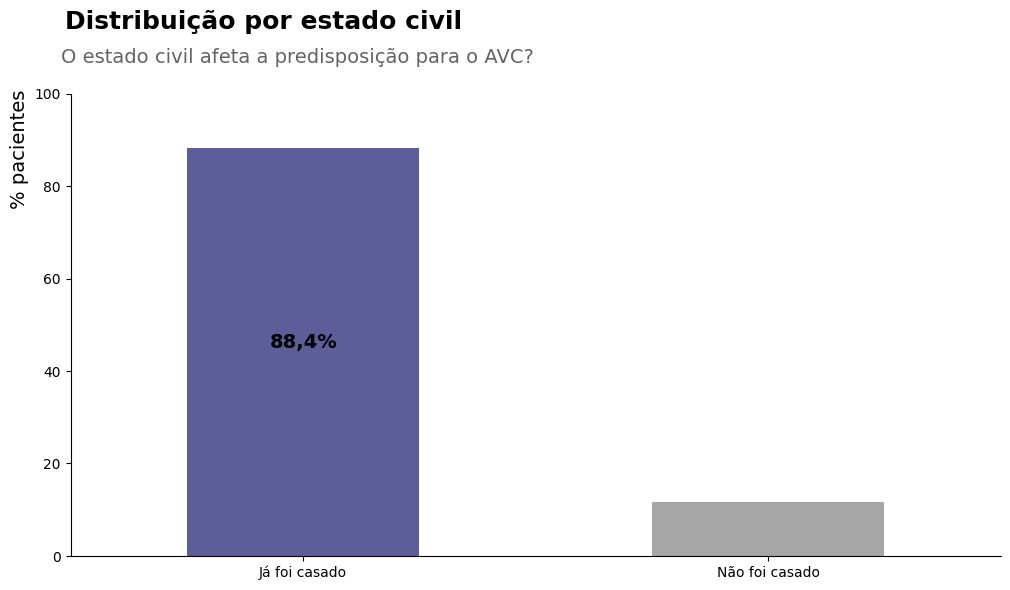

In [16]:
suptitle = 'Distribuição por estado civil'
title = 'O estado civil afeta a predisposição para o AVC?'
colors=['#191970', '#808080']

dist_freq = (avc['ever_married'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['ever_married'].plot.bar(width=0.5, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 100)
plt.grid(False)
plt.text(0, 45, '88,4%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Já foi casado', 'Não foi casado'])
plt.show()

<p style='text-align: justify;'><font size=3.>A porcentagem de pacientes com AVC que já foram casados é de 88,35%. Esse resultado é significativamente maior do que a dos pacientes não casados, o que pode sugerir que o estado civil pode estar associado a uma maior ou menor probabilidade de AVC. Embora não seja reconhecido como um fator de risco direto, o estado civil pode estar associado à um estilo de vida que pode levar a fatores de riscos relacionados à doenca, como por exemplo, sedentarismo ou hábitos alimentares. Porém, vale ressaltar que são apenas suposições e um estudo mais detalhado deve ser realizado.</font></p>

### Tipo de trabalho

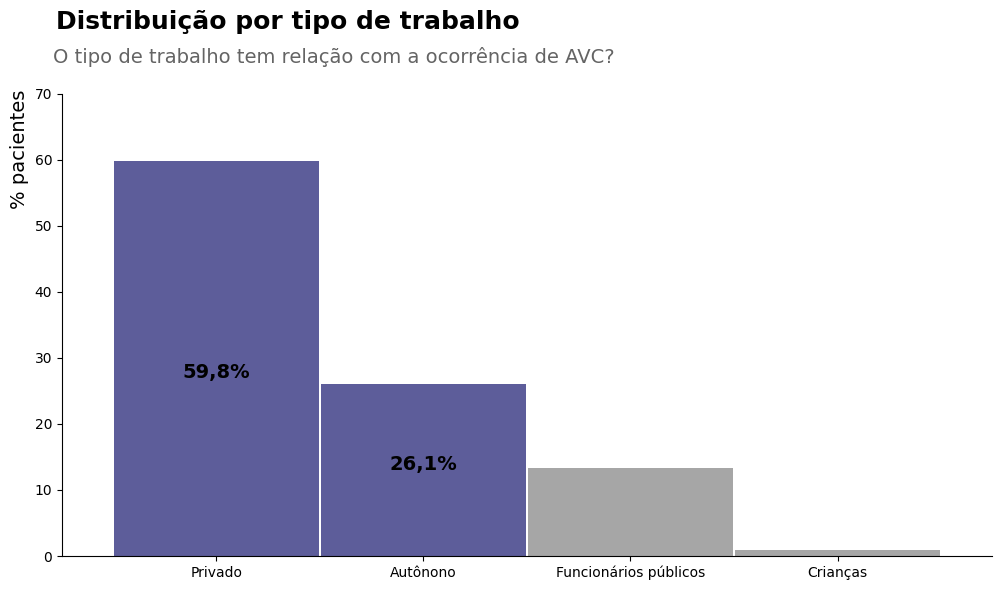

In [17]:
suptitle = 'Distribuição por tipo de trabalho'
title = 'O tipo de trabalho tem relação com a ocorrência de AVC?'
colors=['#191970', '#191970', '#808080', '#808080']

dist_freq = (avc['work_type'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['work_type'].plot.bar(width=0.99, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 70)
plt.grid(False)
plt.text(0, 27, '59,8%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 13, '26,1%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Privado', 'Autônono', 'Funcionários públicos', 'Crianças'])
plt.show()

<p style='text-align: justify;'><font size=3.>Quase 60% dos casos de AVC estão entre pessoas que trabalham em empregos privados e cerca de 26% estão entre pessoas autônomas. A porcentagem entre crianças e funcionários públicos é significativamente menor em relação aos primeiros grupos. Isso pode significar que o tipo de trabalho pode influenciar a probabilidade de ocorrência de AVC e pessoas que trabalham em empregos privados e autônomos parecem estar em maior risco em comparação com os servidores. No entanto, outros fatores precisam ser considerados.</font></p>

### Tipo de residência

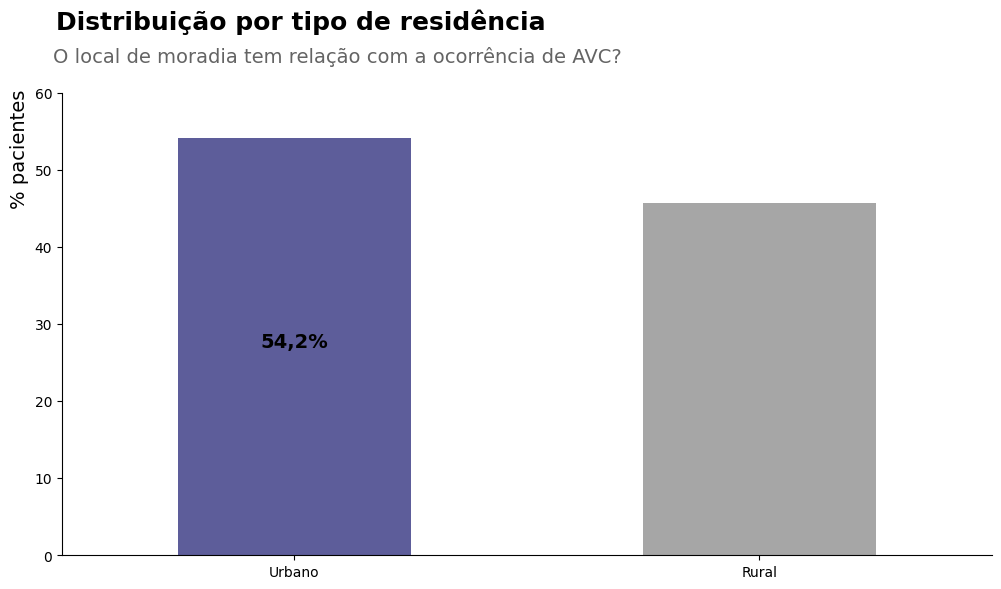

In [18]:
suptitle = 'Distribuição por tipo de residência'
title = 'O local de moradia tem relação com a ocorrência de AVC?'
colors=['#191970', '#808080']

dist_freq = (avc['Residence_type'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['Residence_type'].plot.bar(width=0.5, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 60)
plt.grid(False)
plt.text(0, 27, '54,2%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Urbano', 'Rural'])
plt.show()

<p style='text-align: justify;'><font size=3.>Pelo gráfico podemos ver que a taxa de AVC é ligeiramente maior em áreas urbanas em comparação com áreas rurais. Porém, essa diferença não é muito significativa o que pode indicar que esse pode não ser um fator determinante para a ocorrência de derrames.</font></p>

### Hipertensão

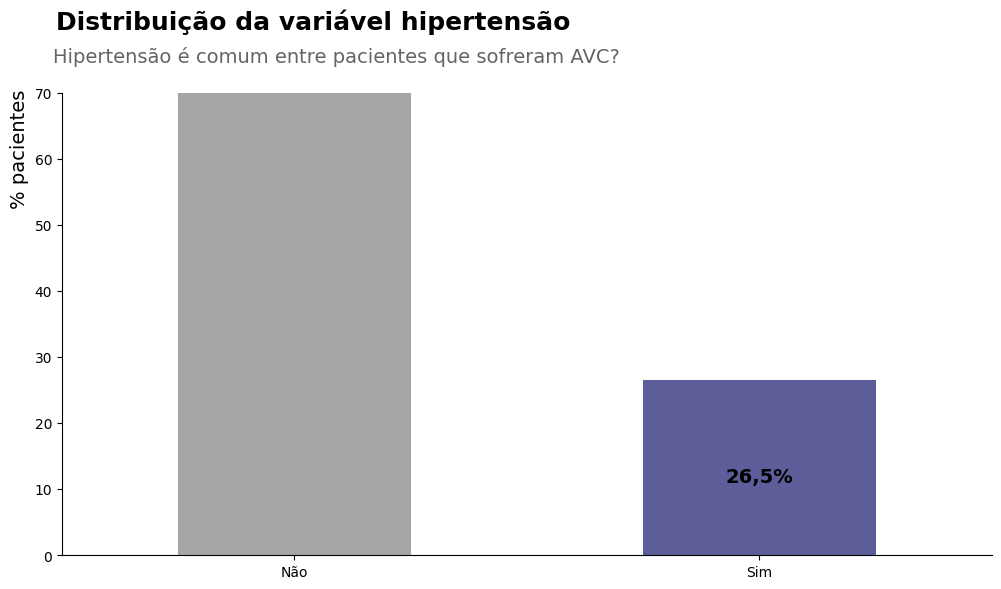

In [19]:
suptitle = 'Distribuição da variável hipertensão'
title = 'Hipertensão é comum entre pacientes que sofreram AVC?'
colors=['#808080', '#191970']

dist_freq = (avc['hypertension'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['hypertension'].plot.bar(width=0.5, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 70)
plt.grid(False)
plt.text(1, 11, '26,5%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Não', 'Sim'])
plt.show()

<p style='text-align: justify;'><font size=3.>Embora a hipertensão seja amplamente reconhecida na literatura médica como um fator que aumenta a probabilidade de ocorrência de um AVC, a maioria dos pacientes na amostra não possui a doença. No entanto, é importante observar que a presença de hipertensão está associada a um quarto significativo (26,51%) da amostra.</font></p>

<font size=2><b>Fontes</b>: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/avc</font>

### Doenças do coração

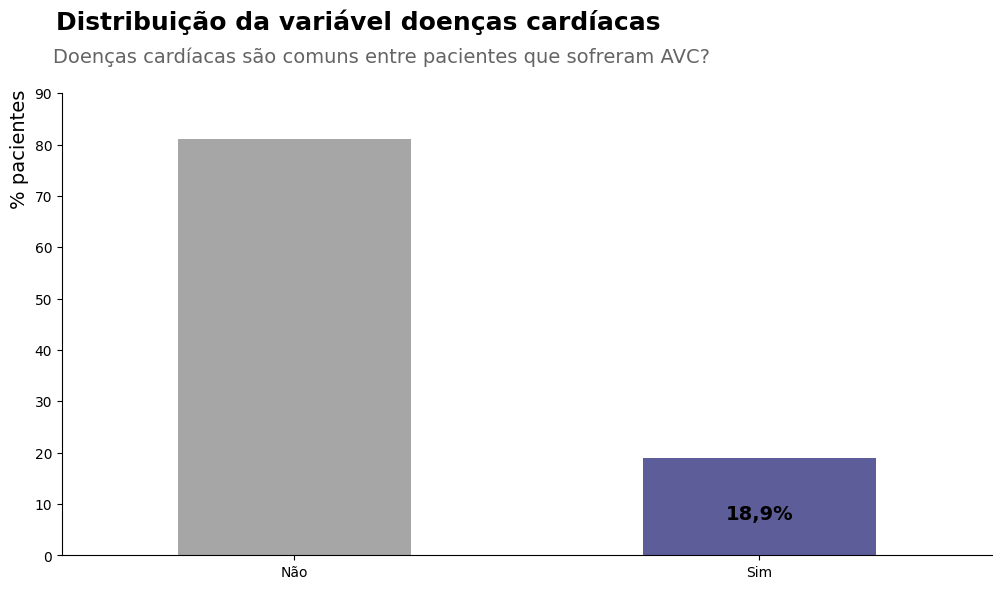

In [20]:
suptitle = 'Distribuição da variável doenças cardíacas'
title = 'Doenças cardíacas são comuns entre pacientes que sofreram AVC?'
colors=['#808080', '#191970']

dist_freq = (avc['heart_disease'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['heart_disease'].plot.bar(width=0.5, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 90)
plt.grid(False)
plt.text(1, 7, '18,9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Não', 'Sim'])
plt.show()

<p style='text-align: justify;'><font size=3.>Embora a maioria dos pacientes não possua doenças cardíacas, percebe-se que existe uma parcela significativa de pacientes com doenças cardíacas entre aqueles que sofreram AVC. Sabe-se que pessoas com doenças cardíacas, principalmente a das artérias coronárias, correm um risco maior de terem um AVC em comparação a pacientes sem a doença.</font></p>

<font size=2><b>Fontes</b>: https://www.redebrasilavc.org.br/quais-sao-os-fatores-de-risco-de-um-avc/</font>

### Nível de glicose

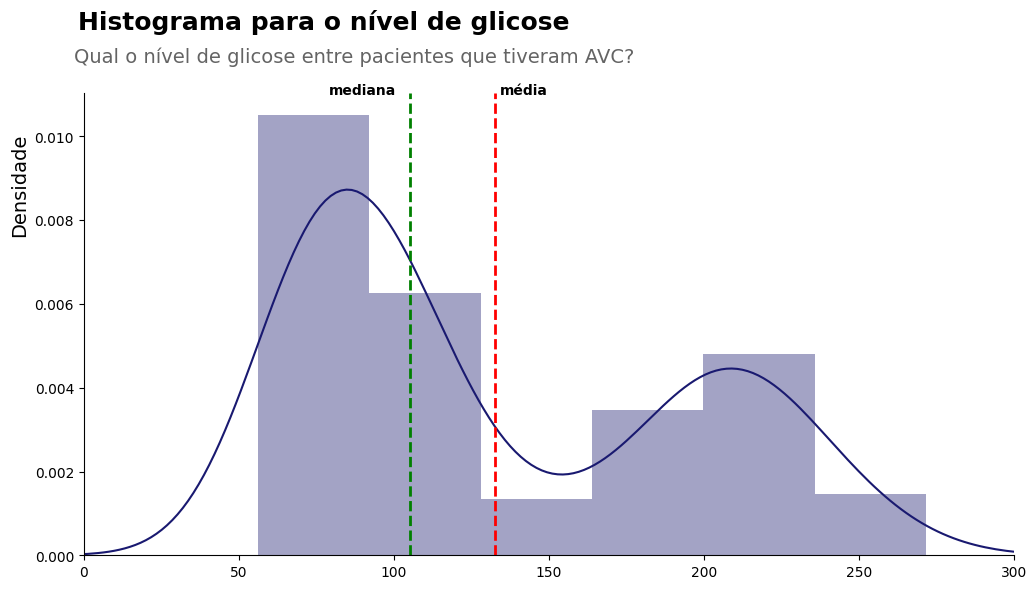

In [21]:
suptitle = 'Histograma para o nível de glicose'
title = 'Qual o nível de glicose entre pacientes que tiveram AVC?'

ax = sns.distplot(avc['avg_glucose_level'], kde=True, color='#191970')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Densidade', fontsize=14, horizontalalignment='left', y=0.69)
ax.set_xlabel(None)
ax.spines[['top', 'right']].set_visible(False)

plt.axvline(x=132.544, color='r', linestyle='dashed', linewidth=2, label='Média')
plt.text(142, 0.011, 'média', fontsize=10, weight='bold', horizontalalignment='center')

plt.axvline(x=105.220, color='g', linestyle='dashed', linewidth=2, label='Mediana')
plt.text(90, 0.011, 'mediana', fontsize=10, weight='bold', horizontalalignment='center')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlim(0, 300)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>O histograma é assimétrico e é possível perceber uma concentração significativa na faixa de valores mais baixos e também alguns valores muito mais altos. A média é de aproximadamente 132,54 mg/dl com um desvio padrão de 61,92 mg/dl, indicando que, em média, os valores de açúcar no sangue na amostra estão acima do limite de referência que é geralmente usado para definir o estágio de pré-diabetes, que é entre 100 e 125 mg/dl. Lembrando que diabetes tabém é um fator de risco para AVC.</font></p>

<p style='text-align: justify;'><font size=3.>Podemos ver também que uma maior concentração de pacientes está na faixa de aproximadamente 56 a 133 mg/dl e que existem alguns pacientes com a taxa de glicose extremamente alta, acima de 200 mg/dl, mas eles são menos comuns nessa amostra. A mediana (105,22 mg/dl) é o valor que divide a distribuição em duas partes aproximadamente iguais.</font></p>

<font size=2><b>Fontes</b>: https://saocamilofortaleza.org.br/pre-diabetes-sintomas-principais-causas-e-tratamentos/</font>

### Status de fumante

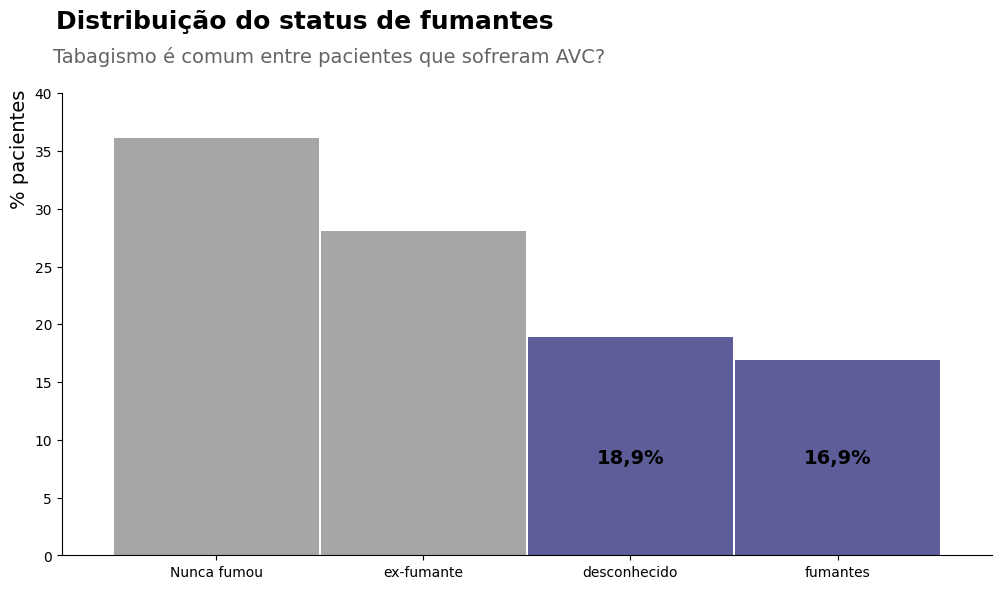

In [22]:
suptitle = 'Distribuição do status de fumantes'
title = 'Tabagismo é comum entre pacientes que sofreram AVC?'
colors=['#808080', '#808080', '#191970', '#191970']

dist_freq = (avc['smoking_status'].value_counts(normalize=True)*100).round(2).reset_index()
dist_freq['smoking_status'].plot.bar(width=0.99, alpha=0.7, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% pacientes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 40)
plt.grid(False)
plt.text(2, 8, '18,9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(3, 8, '16,9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.gca().set_xticklabels(['Nunca fumou', 'ex-fumante', 'desconhecido', 'fumantes'])
plt.show()

<p style='text-align: justify;'><font size=3.>Aproximadamente, 64,25% dos pacientes da amostra nunca fumaram ou já pararam de fumar. No entanto, existe uma proporção de pacientes que são classificados como fumantes ou com status de tabagismo desconhecido que deve ser levada em consideração, uma vez que o tabagismo é um dos fatores que aumentam os riscos de derrame.</font></p>

<font size=2><b>Fontes</b>: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/avc</font>

### Índice de massa corporal

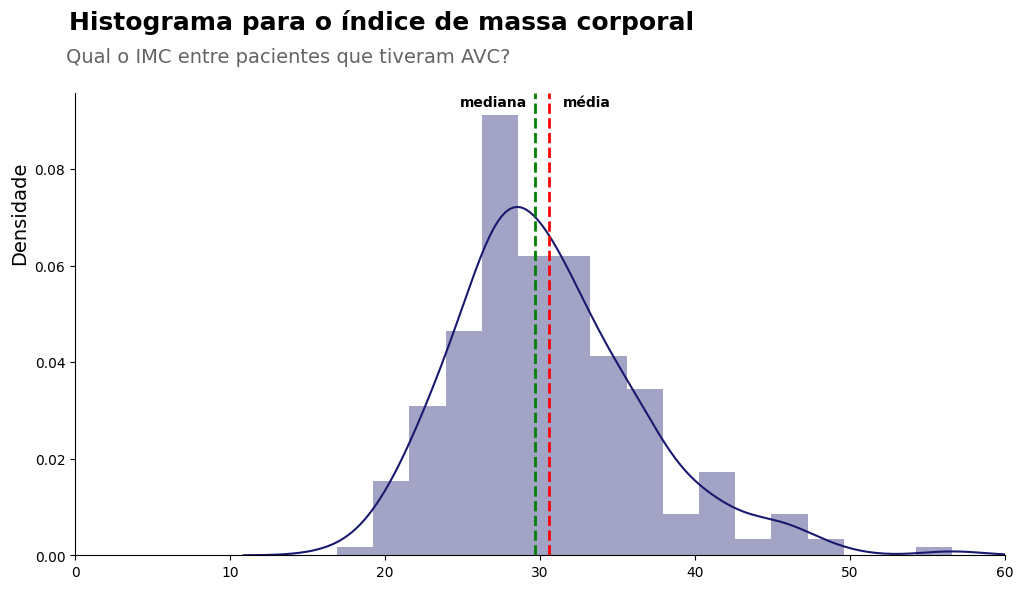

In [23]:
suptitle = 'Histograma para o índice de massa corporal'
title = 'Qual o IMC entre pacientes que tiveram AVC?'

ax = sns.distplot(avc['bmi'], kde=True, color='#191970')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Densidade', fontsize=14, horizontalalignment='left', y=0.63)
ax.set_xlabel(None)
ax.spines[['top', 'right']].set_visible(False)

plt.axvline(x=30.553, color='r', linestyle='dashed', linewidth=2, label='Média')
plt.text(33, 0.093, 'média', fontsize=10, weight='bold', horizontalalignment='center')
plt.axvline(x=29.700, color='g', linestyle='dashed', linewidth=2, label='Mediana')
plt.text(27, 0.093, 'mediana', fontsize=10, weight='bold', horizontalalignment='center')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlim(0, 60)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>A média do IMC desses pacientes é de aproximadamente 30,55, sugerindo que, em média, esses pacientes têm um IMC considerado acima do peso. Alguns pacientes têm IMC inferior a 26, indicando que estão na faixa de peso normal, enquanto outros têm IMC acima de 34, o que pode sugerir obesidade. Os pacientes com IMC acima de 40, são raros na amostra.</font></p>

<p style='text-align: justify;'><font size=3.>Reparem que a média e a mediana são próximas, o que geralmente significa que a distribuição é aproximadamente simétrica, se aproximando da distribuição normal. Isso indica que  a maioria dos pacientes está distribuída de maneira relativamente uniforme em torno da média e da mediana.</font></p>

<font size=1.3><b>Fontes</b>: https://www.progep.ufpb.br/progep/contents/em-destaque/dia-mundial-de-combate-e-prevencao-da-obesidade#:~:text=De%20acordo%20com%20a%20OMS,com%20o%20excesso%20de%20gordura</font>

### Análise de correlação

> Correlação é uma medida que indica se e até que ponto as mudanças em uma variável estão associadas às mudanças em outra variável

In [24]:
avc.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.109000,-0.296355
avg_glucose_level,0.109000,1.000000,0.319407
bmi,-0.296355,0.319407,1.000000


#### Idade vs. nível médio de glicose

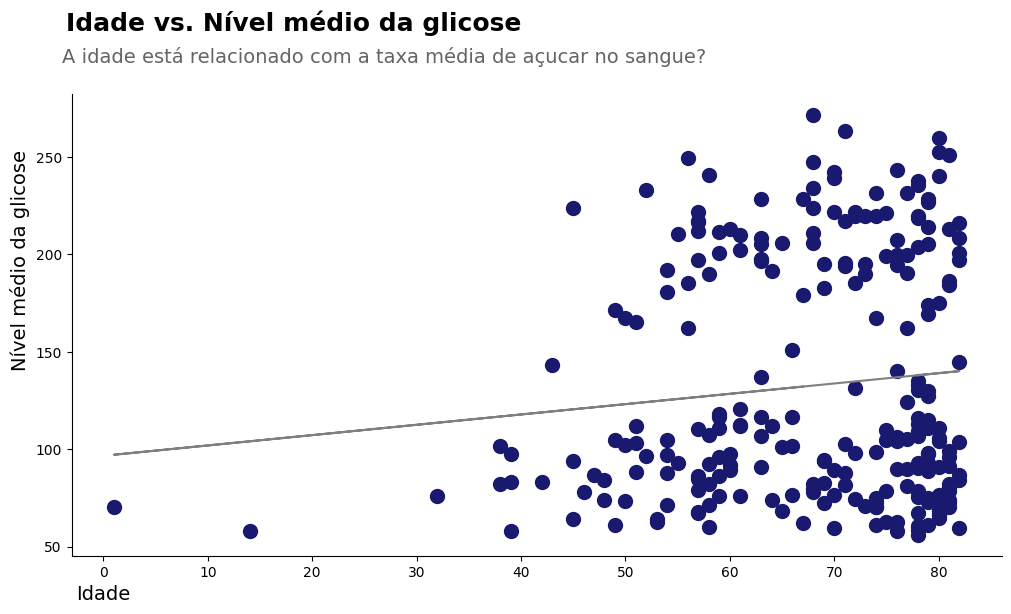

In [25]:
x = avc['age']
y = avc['avg_glucose_level']

suptitle = 'Idade vs. Nível médio da glicose'
title = 'A idade está relacionado com a taxa média de açucar no sangue?'

coef = np.polyfit(x, y, 1)
polynomial = np.poly1d(coef)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='#191970', s=100)
plt.plot(x, polynomial(x), color='#808080', label='Reta de tendência')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('Idade', fontsize=14, horizontalalignment='left', x=0.005)
plt.ylabel('Nível médio da glicose', fontsize=14, horizontalalignment='left', y=0.40)
plt.grid(False)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Temos uma correlação fraca, mas positiva, entre a idade e o nível médio de glicose, indicando que á medida que a idade aumenta, o nível médio de glicose tende a aumentar ligeiramente. Temos poucos pontos mais afastados pro lado das idades menores, o que faz sentido, já que problemas relacionados à diabetes é mais raros em crianças.</font></p>

#### IMC vs. Idade

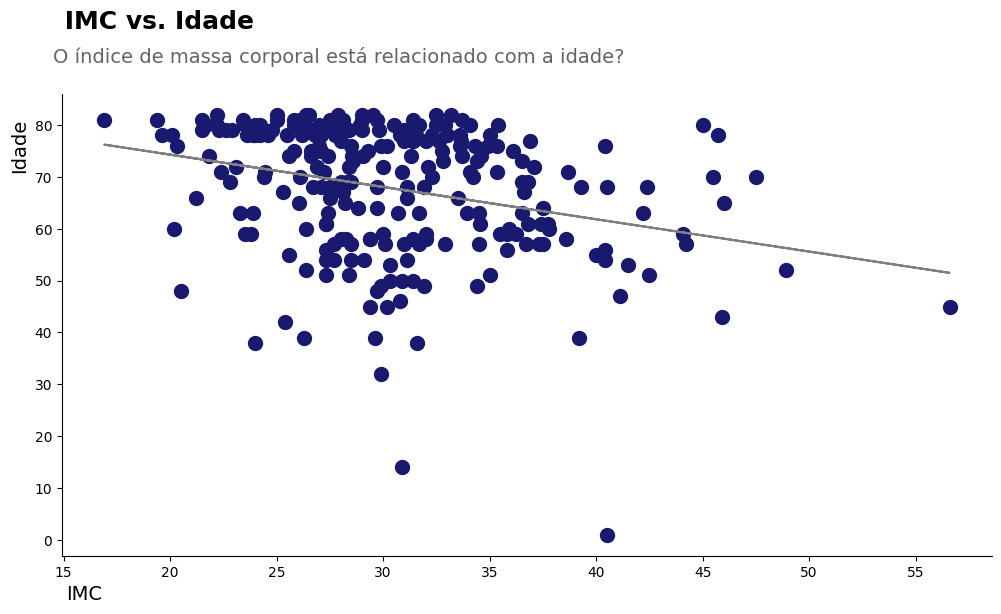

In [26]:
x = avc['bmi']
y = avc['age']

suptitle = ' IMC vs. Idade'
title = 'O índice de massa corporal está relacionado com a idade?'

coef = np.polyfit(x, y, 1)
polynomial = np.poly1d(coef)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='#191970', s=100)
plt.plot(x, polynomial(x), color='#808080', label='Reta de tendência')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('IMC', fontsize=14, horizontalalignment='left', x=0.005)
plt.ylabel('Idade', fontsize=14, horizontalalignment='left', y=0.83)
plt.grid(False)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Em relação a idade e o IMC, percebemos uma correlção negativa moderada, sugerindo que, em média, as pessoas mais velhas podem ter um IMC menor. Também temos alguns pontos mais afastados, indicando exceções.</font></p>

#### IMC vs. Nível de glicose

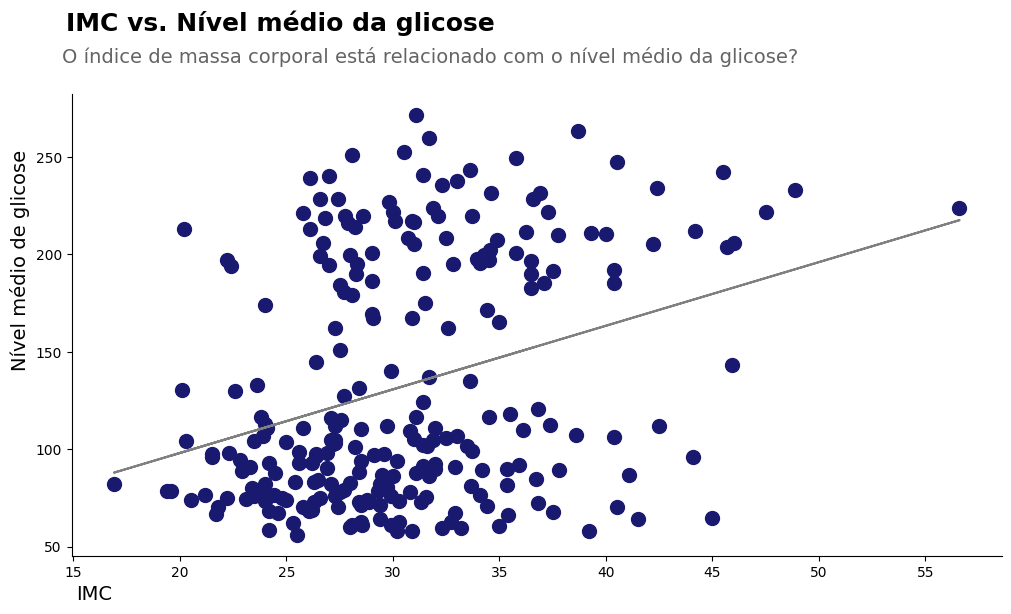

In [27]:
x = avc['bmi']
y = avc['avg_glucose_level']

suptitle = 'IMC vs. Nível médio da glicose'
title = 'O índice de massa corporal está relacionado com o nível médio da glicose?'

coef = np.polyfit(x, y, 1)
polynomial = np.poly1d(coef)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='#191970', s=100)
plt.plot(x, polynomial(x), color='#808080', label='Reta de tendência')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('IMC', fontsize=14, horizontalalignment='left', x=0.005)
plt.ylabel('Nível médio de glicose', fontsize=14, horizontalalignment='left', y=0.40)
plt.grid(False)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Em relação ao nível de glicose e o IMC, temos uma correlação positiva moderada, indicando que quando o nível médio de glicose aumenta, o índice de massa corporal tende a aumentar. Além disso, temos poucos pontos mais distantes que podem indicar pacientes com perfil mais atípico.</font></p>

## Modelagem com MLflow

#### Balanceamento das classes

> Para evitar um modelo tendencioso em relação à classe majoritária, será usado uma amostragem aleatória simples para equilibrar a base

In [28]:
df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

min_class_count = df['stroke'].value_counts()[1]
sampled = df.groupby('stroke').apply(lambda x : x.sample(n=min_class_count, replace=False)).reset_index(drop=True)
sampled['stroke'].value_counts()

No     249
Yes    249
Name: stroke, dtype: int64

#### Pipeline de pré-processamento

> Para recursos numéricos, usamos o StandardScaler para garantir que eles tenham uma escala padrão e para recursos categóricos, aplicamos OneHotEncoder para transformá-los em representações binárias

In [29]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, ['age', 'avg_glucose_level', 'bmi']),
        ('categorical', categorical_transformer, ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
    ])

#### Encoder das labels

> Técnica usada para converter as variáveis categóricas em números inteiros, tornando-as adequadas para serem usadas em algoritmos

In [30]:
X = sampled.drop(['stroke'], axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(sampled['stroke'])

#### Divisão dos dados em treino e teste

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=140, stratify=y)
print(f'Treino: {X_train.shape[0]}')
print(f'Teste: {X_test.shape[0]}')

Treino: 348
Teste: 150


#### Seleção de algoritmos

<p style='text-align: justify;'><font size=3.>Durante o processo de seleção de algoritmos foi a aplicada a técnica de validação cruzada porque ela  ajuda a avaliar o desempenho passando por todo conjunto de dados e dessa forma podemos garantir que determinada performance não está limitada a apenas um subconjunto dos dados, o que garante que o modelo escolhido funciona bem em novos dados e tem um desempenho consistente.</font></p>

<p style='text-align: justify;'><font size=3.>Foram escolhidos os seguintes algoritmos: </font></p>

- <p style='text-align: justify;'><font size=3.><b>LogisticRegression</b>: por ser simples e eficaz para problemas de classificação binária</font></p>
- <p style='text-align: justify;'><font size=3.><b>Random Forest</b>: por lidar bem com dados desbalanceados e com recursos categóricos</font></p>
- <p style='text-align: justify;'><font size=3.><b>Decision Tree</b>: por ser simples e lidar bem com problemas de classificação</font></p>
- <p style='text-align: justify;'><font size=3.><b>SVC</b>: por ser eficaz na separação de classes em problemas de classificação</font></p>
- <p style='text-align: justify;'><font size=3.><b>KNN</b>: por ser simples e útil para lidar com dados de características similares</font></p>
- <p style='text-align: justify;'><font size=3.><b>MLP</b>: por ser capaz de reconhecer relacionamentos complexos nos dados</font></p>

In [32]:
result = {'classificador': [], 'acuracia_media': [], 'desvio_padrao': []}
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', None)])

classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier()
]

for classifier in classifiers:
    full_pipeline.set_params(classifier=classifier)
    scores = cross_val_score(full_pipeline, X, y, cv=5)

    result['classificador'].append(classifier.__class__.__name__)
    result['acuracia_media'].append(scores.mean().round(3))
    result['desvio_padrao'].append(scores.std().round(3))

pd.DataFrame(result).sort_values(by='acuracia_media', ascending=False)

,classificador,acuracia_media,desvio_padrao
0,LogisticRegression,0.777,0.041
1,RandomForestClassifier,0.777,0.045
3,SVC,0.777,0.052
5,MLPClassifier,0.769,0.058
4,KNeighborsClassifier,0.715,0.029
2,DecisionTreeClassifier,0.685,0.057


<p style='text-align: justify;'><font size=3.>Considerando que entre os modelos avaliados, a regressão logística foi o que apresentou uma das acurácias médias mais alta com um desvio padrão relativamente baixo. O que indica uma maior consistência e menor variabilidade entre as diferentes execuções do modelo. Sendo assim, será esse o modelo escolhido para essa tarefa.</font></p>

#### Treinamento modelo final

In [33]:
projeto = 'Machine Learning I - Coders/23'
dataset = 'data/healthcare-dataset-stroke-data.csv'
features = '||'.join(list(X_train.columns))
version = 'vFinal'

tags = {
        'projeto': projeto,
        'dataset': dataset,
        'features': features,
        'version': version
       }

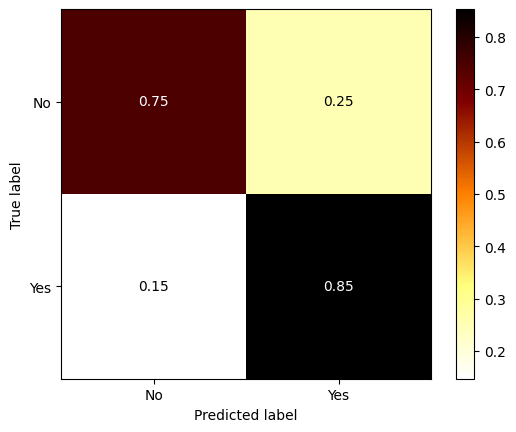

In [34]:
mlflow.set_experiment('RL_experimento')

with mlflow.start_run(run_name='LogisticRegression'):
    mlflow.set_tags(tags)

    penalty = 'l1'
    tol = 0.01
    C = 0.1
    solver = 'liblinear'
    multi_class = 'ovr'
   
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(penalty=penalty,
                                                                      tol=tol,
                                                                      C=C,
                                                                      solver=solver,
                                                                      multi_class=multi_class,
                                                                      random_state=42,
                                                                      max_iter=1000))
                                   ])

    mlflow.log_param('penalty', penalty)
    mlflow.log_param('tol', tol)
    mlflow.log_param('C', C )
    mlflow.log_param('solver', solver)
    mlflow.log_param('multi_class', multi_class)

    """
        Treinamento
    """
    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)
    y_prob = full_pipeline.predict_proba(X_test)

    """
        Métricas
    """
    accuracy = accuracy_score(y_test, y_pred).round(3)
    recall = recall_score(y_test, y_pred, average='weighted').round(3)
    precision = precision_score(y_test, y_pred, average='weighted').round(3)
    f1 = f1_score(y_test, y_pred, average='weighted').round(3)
    log = log_loss(y_test, y_prob).round(3)
    auc = roc_auc_score(y_test, y_pred).round(3)
    
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_.tolist())

    mlflow.log_metric('acuracia', accuracy)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precisão', precision)
    mlflow.log_metric('f1', f1)
    mlflow.log_metric('log', log)
    mlflow.log_metric('auc', auc)

    """
        Matriz de confusão
    """
    np.set_printoptions(precision=2)
    fig, ax = plt.subplots(figsize=(8, 4))
    disp = ConfusionMatrixDisplay.from_estimator(
        full_pipeline,
        X_test,
        y_test,
        display_labels=label_encoder.classes_.tolist(),
        cmap=plt.cm.afmhot_r,
        normalize='true',
        xticks_rotation=None
    )
    plt.savefig('img/matriz_rl.png')
    plt.close(fig)

    """
        Curva ROC
    """
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='LogisticRegression', color='#191970')
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline', color='#808080')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC LogisticRegression')
    plt.legend()
    plt.savefig('img/curva_roc_rl.png')
    plt.close(fig2)

    mlflow.log_artifact(local_path='img/matriz_rl.png', artifact_path='img')
    mlflow.log_artifact(local_path='img/curva_roc_rl.png', artifact_path='img')
    mlflow.log_artifact(local_path=dataset, artifact_path='data')
    mlflow.sklearn.log_model(full_pipeline, 'ModeloRL')

<p style='text-align: justify;'><font size=3.>No contexto dessa tarefa cuja intenção é prever se uma pessoa terá ou não um AVC com o objetivo de prevenir essa ocorrência, o erro mais grave é o Erro Tipo 2 (falso negativo), em que o modelo prevê que um paciente não terá um AVC (negativo) quando, na realidade, terá (positivo). É grave, porque significa que o modelo não conseguiu identificar um risco real de AVC e essa pessoa pode não receber o tratamento preventivo adequado.</font></p>

<p style='text-align: justify;'><font size=3.>Nesse sentido, o objetivo nesse cenário de prevenção de AVC é minimizar os falsos negativos aumentando o recall e tentando garantir que o modelo identifique a maioria dos casos positivos reais.</font></p>

<p style='text-align: justify;'><font size=3.>Ao analisarmos a matriz de confusão em relação ao erro do tipo II, percebemos que em 85% dos casos o modelo acertou ao identificar corretamente pessoas em risco que tiveram um AVC e em 15%, o modelo previu erroneamente que a pessoa não teria um AVC, quando na verdade esse paciente teve e esses são os casos mais graves. De uma maneira geral, o modelo é capaz de identificar a maioria dos casos reais de AVC e é eficaz na previsão de casos negativos.</font></p>

### Relatório de classificação

In [35]:
print(report)

              precision    recall  f1-score   support

          No       0.84      0.75      0.79        75
         Yes       0.77      0.85      0.81        75

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



<p style='text-align: justify;'><font size=3.>O modelo tem a capacidade de acertar 80% das suas previsões, o que é um desempenho razoável. A precisão de 0.80 significa que, das previsões de AVC feitas pelo modelo, cerca de 80% estão corretas. O recall também é de 0.80, o que indica que o modelo é capaz de capturar corretamente cerca de 80% dos casos de AVC reais. O valor de 80% para o F1 sugere um equilíbrio razoável entre precisão e recall.</font></p>

### AUC e Curva ROC

AUC: 0.8 



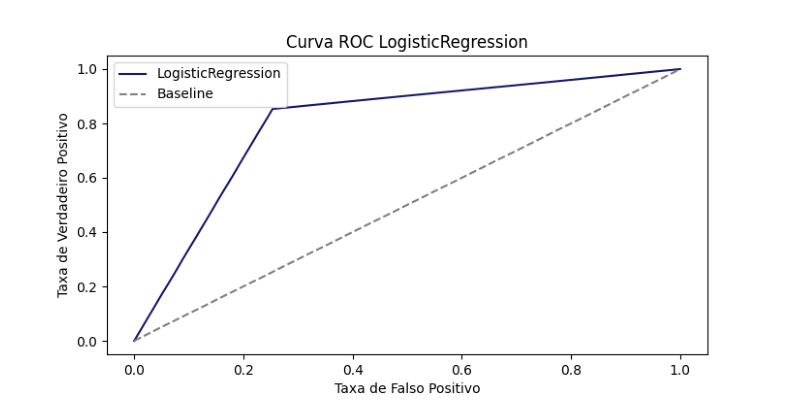

In [36]:
print(f'AUC: {auc} \n')

plt.figure(figsize=(10, 8))
imagem = mpimg.imread('img/curva_roc_rl.png')
plt.imshow(imagem)
plt.axis('off')
plt.show()

<p style='text-align: justify;'><font size=3.>Uma AUC de 80% é um indicativo de que o modelo tem uma boa capacidade de distinguir entre as duas classes, o que é bom uma vez que indica um desempenho significativamente melhor em relação ao baseline. O baseline de 50% representa o desempenho do modelo ao fazer previsões aleatórias e quanto mais longe a curva do modelo estiver do baseline, mais eficaz ele será nas suas previsões.</font></p>

### Conclusão

<p style='text-align: justify;'><font size=3.>Em resumo, o modelo parece ter um desempenho razoável e consistente, mas sempre há espaço para melhorias. Alguns pontos a se considerar seriam: </font></p>

- <p style='text-align: justify;'><font size=3.>Base de dados maior, mais representativa e equilibrada: a amostra foi muito pequena, desbalanceada e não, necessariamente, representa a realidade.</font></p>
- <p style='text-align: justify;'><font size=3.>Consulta a um especialista da área: esse é um campo muito complexo que necessita de uma especialista para acompanhar e elucidar dúvidas.</font></p>
- <p style='text-align: justify;'><font size=3.>Engenharia de Recursos: avaliaria a possibilidade de  inclusão de novos recursos ou melhora dos já existentes.</font></p>
- <p style='text-align: justify;'><font size=3.>Outras famílias de algoritmos: usaria modelos mais robustos para analisar a performance e a capacidade de capturar a complexidade desses dados.</font></p>